<a href="https://colab.research.google.com/github/SrinithiBala2021/Logistic-Regression/blob/main/Project115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
data_to_load = files.upload()

Saving escape_velocity.csv to escape_velocity.csv


In [2]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("escape_velocity.csv")
velocity_list = df["Velocity"].tolist()
escape_list = df["Escaped"].tolist()

fig = px.scatter(x=velocity_list,y=escape_list)
fig.show()

In [3]:
import numpy as np

velocity_array = np.array(velocity_list)
escape_array = np.array(escape_list)

m , c = np.polyfit(velocity_array,escape_array,1)
y = []

for x in velocity_array:
  y_value = m*x+c
  y.append(y_value)

fig = px.scatter(x=velocity_array,y=escape_array)
fig.update_layout(shapes=[
    dict(
        type = 'line',
         y0 = min(y),y1 = max(y),
         x0 = min(velocity_array),x1 = max(velocity_array)
    )
])
fig.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



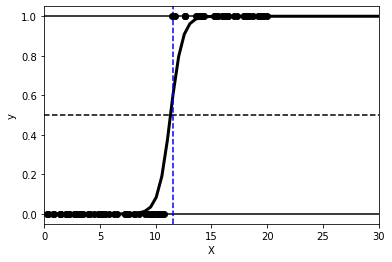

In [6]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

X = np.reshape(velocity_list,(len(velocity_list),1))
Y = np.reshape(escape_list,(len(escape_list),1))

lr = LogisticRegression()
lr.fit(X,Y)

plt.figure()
plt.scatter(X.ravel(),Y,color='black',zorder = 20)

def model(x):
  return  1/(1+np.exp(-x))

X_tests = np.linspace(0,100,200)
melting_chances = model(X_tests * lr.coef_ + lr.intercept_).ravel()

plt.plot(X_tests,melting_chances,color="black",linewidth=3)
plt.axhline(y = 0,color='k',linestyle = '-')
plt.axhline(y = 1,color='k',linestyle = '-')
plt.axhline(y = 0.5,color='k',linestyle = '--')

plt.axvline(x = X_tests[23],color='b',linestyle='--')
plt.ylabel('y')
plt.xlabel('X')
plt.xlim(0,30)
plt.show()


In [9]:
user_input = float(input("Enter The Velocity :"))
chances = model(user_input*lr.coef_+lr.intercept_).ravel()[0]

if chances <=0.01:
  print("It will not be escaped !!")
elif chances >=1:
  print("It will be escaped !!")
elif chances<0.5:
  print("It might not get escaped !!")
else:
  print("It might get escaped !!")


Enter The Velocity :60
It will be escaped !!
